In [2]:
from utils import *
from sklearn import svm
from sklearn.externals import joblib
import numpy as np
import cv2
import argparse
import json, time
from textwrap import fill
from imutils.convenience import url_to_image
import matplotlib.pyplot as plt

In [3]:
TEST_IMAGE="images/img/crop.jpg"
MODEL_PATH="models/rbf_svms.pkl"


#load the analysis for naming reference
with open('data/analysis.json') as f:
    analysis = json.load(f)

In [6]:
def apply(img):
    faceImg, data = getNormalizedFeatures(img, False)

    svms = joblib.load(MODEL_PATH)

    plt.imshow(imutils.opencv2matplotlib(faceImg))
    plt.show()

    for region_name, points in data.items():
        
        X = [points.flatten()]

        y = svms[region_name.encode()].predict(X)[0].decode()
        prob = svms[region_name.encode()].predict_proba(X)
        max_prob = np.amax(prob)*100

        print("【 %s 】\t %s %f%%" % (region_name, y, max_prob))

        for region in analysis["face_regions"]:
            if region["name"] == region_name:
                for feature in region["features"]:
                    if feature["name"] == y:
                        print(fill(feature["analysis"], width=18))
        print(" ")

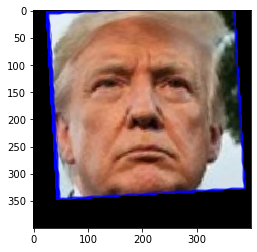

face
【 face 】	 甲字臉 67.029573%
 
eyebrows
【 eyebrows 】	 連心眉 45.637866%
 
eyes
【 eyes 】	 三角眼 47.398374%
 
nose
【 nose 】	 朝天鼻 99.575441%
 
mouth
【 mouth 】	 元寶嘴 85.245664%
 


In [7]:
img = cv2.imread(TEST_IMAGE)
apply(img)